In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import precision_score,accuracy_score,recall_score,mean_squared_error,confusion_matrix,classification_report,roc_auc_score,f1_score
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn import model_selection
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import logging
import warnings
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA 
from scipy.stats import zscore
from sklearn.decomposition import PCA
from google.colab import drive

In [2]:
pd.options.display.max_columns=2000

In [3]:
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [4]:
data=pd.read_csv('/content/MyDrive/MyDrive/AI/training_data.csv')
print(data.shape)

(105000, 26)


In [5]:
df_test=pd.read_csv('/content/MyDrive/MyDrive/AI/testing_data.csv')

In [ ]:
df_test.shape

(45000, 25)

In [ ]:
data.isnull().sum()

ID                          0
Business                    0
Jobs_Reatained              0
Jobs_Created                0
Guaranteed_Approved_Loan    0
Low_Documentation_Loan      0
Demography                  0
State_Of_Bank               0
ChargedOff_Amount           0
Borrower_City               0
Count_Employees             0
Gross_Amount_Disbursed      0
Loan_Term                   0
Code_Franchise              0
Name_Of_Bank                0
Revolving_Credit_Line       0
Default                     0
dtype: int64

In [ ]:
df_test.isnull().sum()

ID                               0
Date_Of_Disbursement           108
Business                         6
Jobs_Reatained                   0
Jobs_Created                     0
Year_Of_Commitment               0
Guaranteed_Approved _Loan        0
Borrower_Name                    2
Low_Documentation_Loan         133
Demography                       0
State_Of_Bank                    0
ChargedOff_Amount                0
Borrower_City                    0
Borrower_State                  49
Gross_Amount_Balance             0
Count_Employees                  0
Classification_Code              0
Loan_Approved_Gross              0
Gross_Amount_Disbursed           0
Loan_Term                        0
Commitment_Date                  0
Primary_Loan_Digit               0
Code_Franchise                   0
Name_Of_Bank                     0
Revolving_Credit_Line        13825
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         105000 non-null  int64 
 1   Date_Of_Disbursement       104765 non-null  object
 2   Business                   104985 non-null  object
 3   Jobs_Reatained             105000 non-null  int64 
 4   Jobs_Created               105000 non-null  int64 
 5   Year_Of_Commitment         105000 non-null  object
 6   Guaranteed_Approved _Loan  105000 non-null  object
 7   Borrower_Name              104997 non-null  object
 8   Low_Documentation_Loan     104633 non-null  object
 9   Demography                 105000 non-null  object
 10  State_Of_Bank              105000 non-null  object
 11  ChargedOff_Amount          105000 non-null  object
 12  Borrower_City              105000 non-null  object
 13  Borrower_State             105000 non-null  

In [ ]:
data.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created', 'Year_Of_Commitment', 'Guaranteed_Approved_Loan',
       'Borrower_Name', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount', 'Borrower_City', 'Borrower_State',
       'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise',
       'Name_Of_Bank', 'Revolving_Credit_Line', 'Default'],
      dtype='object')

In [ ]:
data.isnull().sum().sum()

1111

In [6]:
def process_data(data):
    #replace unexpected values with Unknown
    data.loc[data['Revolving_Credit_Line'].isin(['Yes','No'])==False,'Revolving_Credit_Line']='Unknown'
    data.loc[data['Low_Documentation_Loan'].isin(['Yes','No'])==False,'Low_Documentation_Loan']='Unknown'
    data.loc[data['Business'].isin(['Existing','New'])==False,'Business']='Unknown'
    #Replacing any space in column names
    data.columns=data.columns.str.replace(' ','')
    #Droping less relevent columns based on EDA,correlation 
    data=data.drop(['Primary_Loan_Digit','Gross_Amount_Balance','Year_Of_Commitment','Commitment_Date','Date_Of_Disbursement','Borrower_Name','Loan_Approved_Gross','Borrower_State','Classification_Code'],axis=1)
    data=data.dropna()

    data['Guaranteed_Approved_Loan']=data['Guaranteed_Approved_Loan'].str.replace('Rs.','')
    #data['Gross_Amount_Balance']=data['Gross_Amount_Balance'].str.replace('Rs.','')
    #data['Loan_Approved_Gross']=data['Loan_Approved_Gross'].str.replace('Rs.','')
    data['Gross_Amount_Disbursed']=data['Gross_Amount_Disbursed'].str.replace('Rs.','')
    data['ChargedOff_Amount']=data['ChargedOff_Amount'].str.replace('Rs.','')

    data['Guaranteed_Approved_Loan']= pd.to_numeric(data['Guaranteed_Approved_Loan'])
   # data['Loan_Approved_Gross']= pd.to_numeric(data['Loan_Approved_Gross'])
    data['Gross_Amount_Disbursed']= pd.to_numeric(data['Gross_Amount_Disbursed'])
    data['ChargedOff_Amount']= pd.to_numeric(data['ChargedOff_Amount'])
    data['Business']=data['Business'].astype('category')
    data['Demography']=data['Demography'].astype('category')
    data['State_Of_Bank']=data['State_Of_Bank'].astype('category')
    data['Borrower_City']=data['Borrower_City'].astype('category')
    #data['Classification_Code']=data['Classification_Code'].astype('category')
    #data['Loan_Term']=data['Loan_Term'].astype('category')
    data['Name_Of_Bank']=data['Name_Of_Bank'].astype('category')
    data['Code_Franchise']=data['Code_Franchise'].astype('category')
    data['Revolving_Credit_Line']=data['Revolving_Credit_Line'].astype('category')
    data['Low_Documentation_Loan']=data['Low_Documentation_Loan'].astype('category')

   # data['Borrower_State']=data['Borrower_State'].astype('category')
    return data

In [7]:
#Process train and test data
data=process_data(data)
data_test=process_data(df_test)

In [ ]:
data_test.shape

(45000, 16)

In [ ]:
data.isnull().sum().sum()

0

# EDA

In [ ]:
data['Revolving_Credit_Line'].unique()

['No', 'Unknown', 'Yes']
Categories (3, object): ['No', 'Unknown', 'Yes']

In [ ]:
cols=['Business','Demography','State_Of_Bank','Borrower_City','Name_Of_Bank','Code_Franchise','Revolving_Credit_Line','Low_Documentation_Loan']

for col in cols:
    print(col)
    print(data[col].value_counts())

Business
Existing    74375
New         29415
0             104
Name: Business, dtype: int64
Demography
Urban        57081
Undefined    34620
Rural        12193
Name: Demography, dtype: int64
State_Of_Bank
TR    15358
GJ    10812
AS     9070
JH     7059
ML     5884
MH     5510
BR     5441
PB     4563
AR     4526
OR     3930
AP     2984
LD     2947
HP     2900
JK     2465
CH     2142
KA     2059
HR     1720
KL     1677
CG     1656
UP     1649
GA     1366
RJ     1053
MP     1002
WB      996
DL      794
PY      757
NL      665
DH      569
MZ      539
SK      465
DD      455
UK      451
AN      413
MN       17
Name: State_Of_Bank, dtype: int64
Borrower_City
Jhansi          1494
Siliguri        1245
Ramagundam      1007
Baramula         826
Sahibganj        775
                ... 
Nohar             24
Pasighat          22
Sattenapalle      20
Muvattupuzha      20
Mudhol            19
Name: Borrower_City, Length: 1193, dtype: int64
Classification_Code
0         21932
722110     3397
722211  

In [ ]:
for c in cols:
    print(c,len(data[c].unique()))

Business 3
Demography 3
State_Of_Bank 34
Borrower_City 1193
Classification_Code 1199
Name_Of_Bank 143
Code_Franchise 1202
Revolving_Credit_Line 11
Low_Documentation_Loan 7
Borrower_State 41


In [ ]:
data.describe()

,Jobs_Reatained,Jobs_Created,Guaranteed_Approved_Loan,ChargedOff_Amount,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Default
count,103894.000000,103894.000000,1.038940e+05,1.038940e+05,103894.000000,1.038940e+05,1.038940e+05,103894.000000,103894.000000
mean,12.784136,10.462731,1.153465e+07,1.718967e+06,9.908156,1.495826e+07,1.568137e+07,156.553227,0.277494
std,271.976472,271.773392,1.817930e+07,6.542819e+06,58.365218,2.265326e+07,2.291121e+07,116.563135,0.447765
min,0.000000,0.000000,4.064000e+04,0.000000e+00,0.000000,8.128000e+04,3.251200e+05,0.000000,0.000000
25%,0.000000,0.000000,1.625600e+06,0.000000e+00,2.000000,2.616180e+06,3.251200e+06,90.000000,0.000000
50%,1.000000,0.000000,4.226560e+06,0.000000e+00,4.000000,6.502400e+06,7.872131e+06,126.000000,0.000000
75%,4.000000,1.000000,1.320800e+07,6.274613e+05,9.000000,1.704543e+07,1.826207e+07,180.000000,1.000000
max,8800.000000,8800.000000,3.657600e+08,1.625599e+08,7200.000000,4.064000e+08,7.311136e+08,692.000000,1.000000


In [ ]:
pd.options.display.max_columns=40

In [ ]:
data.head()

,Business,Jobs_Reatained,Jobs_Created,Guaranteed_Approved_Loan,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,Existing,0,0,33121600.0,No,Undefined,AP,0.00,Mumbai,Maharashtra,38,0,40640000.0,40640000.00,126,1,Axis Bank Ltd.,No,0
1,New,0,6,32735520.0,No,Urban,TR,38283367.68,Delhi,Delhi,6,451120,43647360.0,43647360.00,123,1,Bandhan Bank Ltd.,0,1
2,Existing,4,0,1422400.0,No,Urban,AS,0.00,Bengaluru,Karnataka,4,541618,2844800.0,5961400.32,90,1,CSB Bank Limited,Yes,0
3,New,9,1,2032000.0,No,Urban,BR,0.00,Ahmedabad,Gujarat,7,811112,4064000.0,4064000.00,126,0,City Union Bank Ltd.,Yes,0
4,Existing,4,0,22981920.0,No,Urban,TR,22862519.68,Hyderabad,Telangana,4,722211,30642560.0,30642560.00,104,1,DCB Bank Ltd.,0,1


In [ ]:
data.mean()

Jobs_Reatained              1.278414e+01
Jobs_Created                1.046273e+01
Guaranteed_Approved_Loan    1.153465e+07
ChargedOff_Amount           1.718967e+06
Count_Employees             9.908156e+00
Loan_Approved_Gross         1.495826e+07
Gross_Amount_Disbursed      1.568137e+07
Loan_Term                   1.565532e+02
Default                     2.774944e-01
dtype: float64

In [ ]:
data.median()

Jobs_Reatained                    1.00
Jobs_Created                      0.00
Guaranteed_Approved_Loan    4226560.00
ChargedOff_Amount                 0.00
Count_Employees                   4.00
Loan_Approved_Gross         6502400.00
Gross_Amount_Disbursed      7872130.56
Loan_Term                       126.00
Default                           0.00
dtype: float64

In [ ]:
cols=['Business','Demography','State_Of_Bank','Borrower_City','Name_Of_Bank','Code_Franchise','Revolving_Credit_Line','Low_Documentation_Loan']

data[cols].mode().T

,0
Business,Existing
Demography,Urban
State_Of_Bank,TR
Borrower_City,Jhansi
Name_Of_Bank,ICICI Bank Ltd.
Code_Franchise,1
Revolving_Credit_Line,No
Low_Documentation_Loan,No


In [ ]:
data.duplicated().sum()

11

In [ ]:
print("Data:",data.quantile(q=0.25))


Data: Jobs_Reatained                    0.00
Jobs_Created                      0.00
Guaranteed_Approved_Loan    1625600.00
ChargedOff_Amount                 0.00
Count_Employees                   2.00
Loan_Approved_Gross         2616179.68
Gross_Amount_Disbursed      3251200.00
Loan_Term                        90.00
Default                           0.00
Name: 0.25, dtype: float64


In [ ]:
print("Data:",data.quantile(q=0.75))

Data: Jobs_Reatained                     4.00
Jobs_Created                       1.00
Guaranteed_Approved_Loan    13208000.00
ChargedOff_Amount             627461.28
Count_Employees                    9.00
Loan_Approved_Gross         17045432.00
Gross_Amount_Disbursed      18262071.68
Loan_Term                        180.00
Default                            1.00
Name: 0.75, dtype: float64


In [ ]:
print("Data:",data.quantile(q=0.50))

Data: Jobs_Reatained                    1.00
Jobs_Created                      0.00
Guaranteed_Approved_Loan    4226560.00
ChargedOff_Amount                 0.00
Count_Employees                   4.00
Loan_Approved_Gross         6502400.00
Gross_Amount_Disbursed      7872130.56
Loan_Term                       126.00
Default                           0.00
Name: 0.5, dtype: float64


<AxesSubplot:>

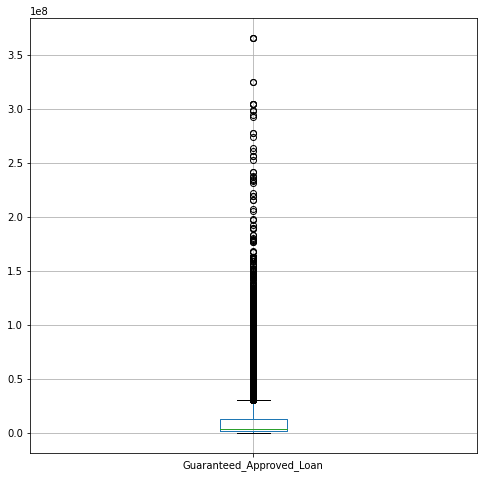

In [ ]:
data.boxplot(column='Guaranteed_Approved_Loan',figsize=(8,8))

<AxesSubplot:>

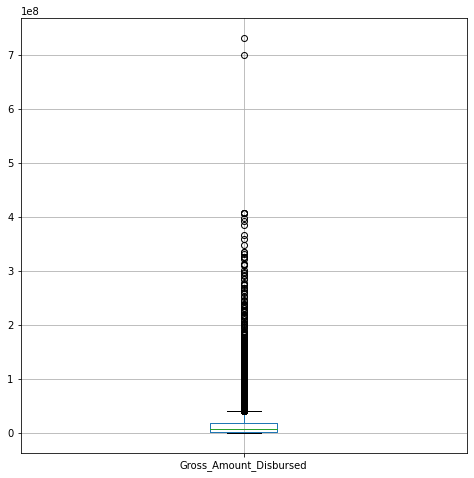

In [ ]:
data.boxplot(column='Gross_Amount_Disbursed',figsize=(8,8))

<AxesSubplot:>

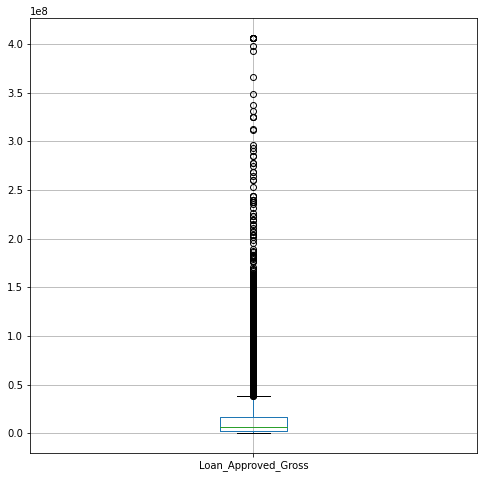

In [ ]:
data.boxplot(column='Loan_Approved_Gross',figsize=(8,8))


In [ ]:
data.cov()

,Jobs_Reatained,Jobs_Created,Guaranteed_Approved_Loan,ChargedOff_Amount,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Default
Jobs_Reatained,7.397120e+04,7.370144e+04,8.924576e+07,2.335811e+07,2.063464e+02,8.074741e+07,7.876439e+07,6.381177e+02,1.766090e+00
Jobs_Created,7.370144e+04,7.386078e+04,8.528120e+07,2.290026e+07,1.530448e+02,6.923854e+07,6.260371e+07,7.070755e+02,1.734895e+00
Guaranteed_Approved_Loan,8.924576e+07,8.528120e+07,3.304870e+14,2.676161e+13,1.149449e+08,4.016871e+14,3.926083e+14,1.120267e+09,-1.303118e+06
ChargedOff_Amount,2.335811e+07,2.290026e+07,2.676161e+13,4.280848e+13,4.979247e+06,3.847209e+13,3.855368e+13,-3.078598e+07,1.233660e+06
Count_Employees,2.063464e+02,1.530448e+02,1.149449e+08,4.979247e+06,3.406499e+03,1.391028e+08,1.370283e+08,3.981466e+02,-9.205832e-01
Loan_Approved_Gross,8.074741e+07,6.923854e+07,4.016871e+14,3.847209e+13,1.391028e+08,5.131700e+14,5.050628e+14,1.332548e+09,-1.471857e+06
Gross_Amount_Disbursed,7.876439e+07,6.260371e+07,3.926083e+14,3.855368e+13,1.370283e+08,5.050628e+14,5.249236e+14,1.254444e+09,-1.373689e+06
Loan_Term,6.381177e+02,7.070755e+02,1.120267e+09,-3.078598e+07,3.981466e+02,1.332548e+09,1.254444e+09,1.358696e+04,-1.971945e+01
Default,1.766090e+00,1.734895e+00,-1.303118e+06,1.233660e+06,-9.205832e-01,-1.471857e+06,-1.373689e+06,-1.971945e+01,2.004932e-01


In [ ]:
data.corr()

,Jobs_Reatained,Jobs_Created,Guaranteed_Approved_Loan,ChargedOff_Amount,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Default
Jobs_Reatained,1.000000,0.997098,0.018050,0.013126,0.012999,0.013106,0.012640,0.020128,0.014502
Jobs_Created,0.997098,1.000000,0.017261,0.012879,0.009648,0.011246,0.010054,0.022320,0.014257
Guaranteed_Approved_Loan,0.018050,0.017261,1.000000,0.224994,0.108332,0.975394,0.942615,0.528668,-0.160087
ChargedOff_Amount,0.013126,0.012879,0.224994,1.000000,0.013039,0.259567,0.257189,-0.040367,0.421096
Count_Employees,0.012999,0.009648,0.108332,0.013039,1.000000,0.105209,0.102473,0.058523,-0.035226
Loan_Approved_Gross,0.013106,0.011246,0.975394,0.259567,0.105209,1.000000,0.973121,0.504651,-0.145106
Gross_Amount_Disbursed,0.012640,0.010054,0.942615,0.257189,0.102473,0.973121,1.000000,0.469723,-0.133903
Loan_Term,0.020128,0.022320,0.528668,-0.040367,0.058523,0.504651,0.469723,1.000000,-0.377819
Default,0.014502,0.014257,-0.160087,0.421096,-0.035226,-0.145106,-0.133903,-0.377819,1.000000


In [ ]:
data.skew()

Jobs_Reatained              32.169322
Jobs_Created                32.243485
Guaranteed_Approved_Loan     3.847675
ChargedOff_Amount            8.891893
Count_Employees             68.031693
Gross_Amount_Disbursed       4.227568
Loan_Term                    1.205299
Default                      0.993870
dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103894 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Business                  103894 non-null  category
 1   Jobs_Reatained            103894 non-null  int64   
 2   Jobs_Created              103894 non-null  int64   
 3   Guaranteed_Approved_Loan  103894 non-null  float64 
 4   Low_Documentation_Loan    103894 non-null  category
 5   Demography                103894 non-null  category
 6   State_Of_Bank             103894 non-null  category
 7   ChargedOff_Amount         103894 non-null  float64 
 8   Borrower_City             103894 non-null  category
 9   Borrower_State            103894 non-null  category
 10  Count_Employees           103894 non-null  int64   
 11  Classification_Code       103894 non-null  category
 12  Gross_Amount_Disbursed    103894 non-null  float64 
 13  Loan_Term                 103

In [ ]:
data['Default'].value_counts()

0    75064
1    28830
Name: Default, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Business'>

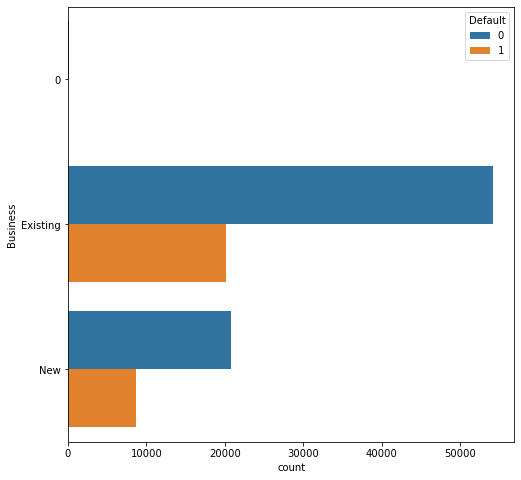

In [ ]:
plt.subplots(figsize=(8,8))
sns.countplot( y='Business',hue='Default',data=data)

<AxesSubplot:xlabel='Revolving_Credit_Line', ylabel='count'>

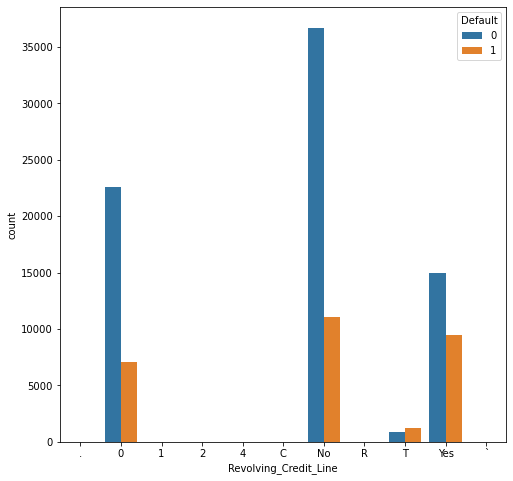

In [ ]:
plt.subplots(figsize=(8,8))
sns.countplot( x='Revolving_Credit_Line',hue='Default',data=data,orient='v')

<AxesSubplot:xlabel='State_Of_Bank', ylabel='count'>

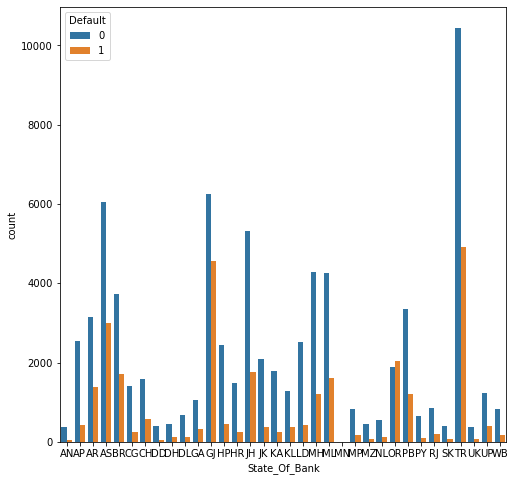

In [ ]:
plt.subplots(figsize=(8,8))
sns.countplot( x='State_Of_Bank',hue='Default',data=data,orient='v')

# Processing

In [8]:
#Using standard scaler to scale the numerical columns
stdScaler = StandardScaler()
numericCols=[]
catCols=[]
for col in data.columns:
    if (data[col].dtype=="int64" or data[col].dtype=="float64"):
        if (col!="Default"and col!="ID"):
            numericCols.append(col)
    if data[col].dtype=='category':
        catCols.append(col)
print(numericCols)
print(catCols)

['Jobs_Reatained', 'Jobs_Created', 'Guaranteed_Approved_Loan', 'ChargedOff_Amount', 'Count_Employees', 'Gross_Amount_Disbursed', 'Loan_Term']
['Business', 'Low_Documentation_Loan', 'Demography', 'State_Of_Bank', 'Borrower_City', 'Code_Franchise', 'Name_Of_Bank', 'Revolving_Credit_Line']


In [9]:
df=data.copy()

In [10]:
df[numericCols]=stdScaler.fit_transform(df[numericCols])
df.head()

,ID,Business,Jobs_Reatained,Jobs_Created,Guaranteed_Approved_Loan,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Count_Employees,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,Existing,-0.046901,-0.038393,1.187758,No,Undefined,AP,-0.262560,Mumbai,0.483104,1.092417,-0.261471,1,Axis Bank Ltd.,No,0
1,1,New,-0.046901,-0.016199,1.166532,No,Urban,TR,5.609054,Delhi,-0.067133,1.223822,-0.287241,1,Bandhan Bank Ltd.,Unknown,1
2,2,Existing,-0.032116,-0.038393,-0.555003,No,Urban,AS,-0.262560,Bengaluru,-0.101523,-0.422848,-0.570717,1,CSB Bank Limited,Yes,0
3,3,New,-0.013634,-0.034694,-0.521488,No,Urban,BR,-0.262560,Ahmedabad,-0.049938,-0.505755,-0.261471,0,City Union Bank Ltd.,Yes,0
4,4,Existing,-0.032116,-0.038393,0.630298,No,Urban,TR,3.243921,Hyderabad,-0.101523,0.655583,-0.450454,1,DCB Bank Ltd.,Unknown,1


In [11]:
data_test[numericCols]=stdScaler.transform(data_test[numericCols])

In [12]:
df_enc=df.drop(['Default','ID'],axis=1)

In [ ]:
df_enc.shape

(105000, 15)

In [13]:
df_test_enc=data_test.drop(['ID'],axis=1)

In [ ]:
df_test_enc.shape

(45000, 15)

In [14]:
#combining test and training data for encoding
df_combined=pd.concat([df_enc,df_test_enc])


In [15]:
df_combined.columns

Index(['Business', 'Jobs_Reatained', 'Jobs_Created',
       'Guaranteed_Approved_Loan', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount', 'Borrower_City',
       'Count_Employees', 'Gross_Amount_Disbursed', 'Loan_Term',
       'Code_Franchise', 'Name_Of_Bank', 'Revolving_Credit_Line'],
      dtype='object')

In [ ]:
df_combined.shape

(150000, 15)

In [15]:
#Encoding categorical columns
df_combined=pd.get_dummies(df_combined,drop_first=True)

In [16]:
#Spliting train and test data
df_encoded=df_combined[:105000]
df_test_encoded=df_combined[105000:]

In [ ]:
df_encoded.shape

(105000, 1432)

In [17]:
df_encoded=df_encoded.join(df['Default'])

In [ ]:
df_encoded.head(3)

,Jobs_Reatained,Jobs_Created,Guaranteed_Approved_Loan,ChargedOff_Amount,Count_Employees,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Business_New,Business_Unknown,Low_Documentation_Loan_Unknown,Low_Documentation_Loan_Yes,Demography_Undefined,Demography_Urban,State_Of_Bank_AP,State_Of_Bank_AR,State_Of_Bank_AS,State_Of_Bank_BR,State_Of_Bank_CG,State_Of_Bank_CH,State_Of_Bank_DD,State_Of_Bank_DH,State_Of_Bank_DL,State_Of_Bank_GA,State_Of_Bank_GJ,State_Of_Bank_HP,State_Of_Bank_HR,State_Of_Bank_JH,State_Of_Bank_JK,State_Of_Bank_KA,State_Of_Bank_KL,State_Of_Bank_LD,State_Of_Bank_MH,State_Of_Bank_ML,State_Of_Bank_MN,State_Of_Bank_MP,State_Of_Bank_MZ,State_Of_Bank_NL,State_Of_Bank_OR,State_Of_Bank_PB,State_Of_Bank_PY,State_Of_Bank_RJ,State_Of_Bank_SK,State_Of_Bank_TR,State_Of_Bank_UK,State_Of_Bank_UP,State_Of_Bank_WB,Borrower_City_Achhnera,Borrower_City_Adalaj,Borrower_City_Adilabad,Borrower_City_Adityapur,Borrower_City_Adoni,Borrower_City_Adoor,Borrower_City_Adra,Borrower_City_Adyar,Borrower_City_Afzalpur,Borrower_City_Agartala,Borrower_City_Agra,Borrower_City_Ahmedabad,Borrower_City_Ahmednagar,Borrower_City_Aizawl,Borrower_City_Ajmer,Borrower_City_Akola,Borrower_City_Akot,Borrower_City_Alappuzha,Borrower_City_Aligarh,Borrower_City_AlipurdUrban Agglomerationr,Borrower_City_Alirajpur,Borrower_City_Allahabad,Borrower_City_Alwar,Borrower_City_Amalapuram,Borrower_City_Amalner,Borrower_City_Ambejogai,Borrower_City_Ambikapur,Borrower_City_Amravati,Borrower_City_Amreli,Borrower_City_Amritsar,Borrower_City_Amroha,Borrower_City_Anakapalle,Borrower_City_Anand,Borrower_City_Anantapur,Borrower_City_Anantnag,Borrower_City_Anjangaon,Borrower_City_Anjar,Borrower_City_Ankleshwar,Borrower_City_Arakkonam,Borrower_City_Arambagh,Borrower_City_Araria,Borrower_City_Arrah,Borrower_City_Arsikere,Borrower_City_Aruppukkottai,Borrower_City_Arvi,Borrower_City_Arwal,Borrower_City_Asansol,Borrower_City_Asarganj,Borrower_City_Ashok Nagar,Borrower_City_Athni,Borrower_City_Attingal,Borrower_City_Aurangabad,Borrower_City_Azamgarh,Borrower_City_BAYVILLE,Borrower_City_BIRD-IN-HAND,Borrower_City_BREWSTER,Borrower_City_Bagaha,Borrower_City_Bageshwar,Borrower_City_Bahadurgarh,Borrower_City_Baharampur,Borrower_City_Bahraich,Borrower_City_Balaghat,Borrower_City_Balangir,Borrower_City_Baleshwar Town,Borrower_City_Ballari,Borrower_City_Balurghat,Borrower_City_Bankura,Borrower_City_Bapatla,Borrower_City_Baramula,Borrower_City_Barbil,Borrower_City_Bargarh,Borrower_City_Barh,Borrower_City_Baripada Town,Borrower_City_Barmer,Borrower_City_Barnala,Borrower_City_Barpeta,Borrower_City_Batala,Borrower_City_Bathinda,Borrower_City_Begusarai,Borrower_City_Belagavi,Borrower_City_Bellampalle,Borrower_City_Belonia,Borrower_City_Bengaluru,Borrower_City_Bettiah,Borrower_City_BhabUrban Agglomeration,Borrower_City_Bhadrachalam,Borrower_City_Bhadrak,Borrower_City_Bhagalpur,Borrower_City_Bhainsa,Borrower_City_Bharatpur,Borrower_City_Bharuch,Borrower_City_Bhatapara,Borrower_City_Bhavnagar,Borrower_City_Bhawanipatna,Borrower_City_Bheemunipatnam,Borrower_City_Bhilai Nagar,Borrower_City_Bhilwara,Borrower_City_Bhimavaram,Borrower_City_Bhiwandi,Borrower_City_Bhiwani,Borrower_City_Bhongir,Borrower_City_Bhopal,Borrower_City_Bhubaneswar,Borrower_City_Bhuj,Borrower_City_Bikaner,Borrower_City_Bilaspur,Borrower_City_Bobbili,Borrower_City_Bodhan,Borrower_City_Bokaro Steel City,Borrower_City_Bongaigaon City,Borrower_City_Brahmapur,Borrower_City_Brookline (town of),Borrower_City_Buxar,Borrower_City_Byasanagar,Borrower_City_CALIFORNIA,Borrower_City_CAMDEN,Borrower_City_CARHAGE,Borrower_City_CHESTER,Borrower_City_COCHRANTON,Borrower_City_Chaibasa,Borrower_City_Chalakudy,Borrower_City_Chandausi,Borrower_City_Chandigarh,Borrower_City_Changanassery,Borrower_City_Charkhi Dadri,Borrower_City_Chatra,Borrower_City_Chennai,Borrower_City_Cherthala,Borrower_City_Chhapra,Borrower_City_Chikkamagaluru,Borrower_City_Chilakaluripet,Borrower_City_Chirala,Borrower_City_Chirkunda,Borrower_City_Chirmiri,Borrower_City_Chittoor,Bor

In [ ]:
df_test_encoded.head(3)

,Jobs_Reatained,Jobs_Created,Guaranteed_Approved_Loan,ChargedOff_Amount,Count_Employees,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Business_New,Business_Unknown,Low_Documentation_Loan_Unknown,Low_Documentation_Loan_Yes,Demography_Undefined,Demography_Urban,State_Of_Bank_AP,State_Of_Bank_AR,State_Of_Bank_AS,State_Of_Bank_BR,State_Of_Bank_CG,State_Of_Bank_CH,State_Of_Bank_DD,State_Of_Bank_DH,State_Of_Bank_DL,State_Of_Bank_GA,State_Of_Bank_GJ,State_Of_Bank_HP,State_Of_Bank_HR,State_Of_Bank_JH,State_Of_Bank_JK,State_Of_Bank_KA,State_Of_Bank_KL,State_Of_Bank_LD,State_Of_Bank_MH,State_Of_Bank_ML,State_Of_Bank_MN,State_Of_Bank_MP,State_Of_Bank_MZ,State_Of_Bank_NL,State_Of_Bank_OR,State_Of_Bank_PB,State_Of_Bank_PY,State_Of_Bank_RJ,State_Of_Bank_SK,State_Of_Bank_TR,State_Of_Bank_UK,State_Of_Bank_UP,State_Of_Bank_WB,Borrower_City_Achhnera,Borrower_City_Adalaj,Borrower_City_Adilabad,Borrower_City_Adityapur,Borrower_City_Adoni,Borrower_City_Adoor,Borrower_City_Adra,Borrower_City_Adyar,Borrower_City_Afzalpur,Borrower_City_Agartala,Borrower_City_Agra,Borrower_City_Ahmedabad,Borrower_City_Ahmednagar,Borrower_City_Aizawl,Borrower_City_Ajmer,Borrower_City_Akola,Borrower_City_Akot,Borrower_City_Alappuzha,Borrower_City_Aligarh,Borrower_City_AlipurdUrban Agglomerationr,Borrower_City_Alirajpur,Borrower_City_Allahabad,Borrower_City_Alwar,Borrower_City_Amalapuram,Borrower_City_Amalner,Borrower_City_Ambejogai,Borrower_City_Ambikapur,Borrower_City_Amravati,Borrower_City_Amreli,Borrower_City_Amritsar,Borrower_City_Amroha,Borrower_City_Anakapalle,Borrower_City_Anand,Borrower_City_Anantapur,Borrower_City_Anantnag,Borrower_City_Anjangaon,Borrower_City_Anjar,Borrower_City_Ankleshwar,Borrower_City_Arakkonam,Borrower_City_Arambagh,Borrower_City_Araria,Borrower_City_Arrah,Borrower_City_Arsikere,Borrower_City_Aruppukkottai,Borrower_City_Arvi,Borrower_City_Arwal,Borrower_City_Asansol,Borrower_City_Asarganj,Borrower_City_Ashok Nagar,Borrower_City_Athni,Borrower_City_Attingal,Borrower_City_Aurangabad,Borrower_City_Azamgarh,Borrower_City_BAYVILLE,Borrower_City_BIRD-IN-HAND,Borrower_City_BREWSTER,Borrower_City_Bagaha,Borrower_City_Bageshwar,Borrower_City_Bahadurgarh,Borrower_City_Baharampur,Borrower_City_Bahraich,Borrower_City_Balaghat,Borrower_City_Balangir,Borrower_City_Baleshwar Town,Borrower_City_Ballari,Borrower_City_Balurghat,Borrower_City_Bankura,Borrower_City_Bapatla,Borrower_City_Baramula,Borrower_City_Barbil,Borrower_City_Bargarh,Borrower_City_Barh,Borrower_City_Baripada Town,Borrower_City_Barmer,Borrower_City_Barnala,Borrower_City_Barpeta,Borrower_City_Batala,Borrower_City_Bathinda,Borrower_City_Begusarai,Borrower_City_Belagavi,Borrower_City_Bellampalle,Borrower_City_Belonia,Borrower_City_Bengaluru,Borrower_City_Bettiah,Borrower_City_BhabUrban Agglomeration,Borrower_City_Bhadrachalam,Borrower_City_Bhadrak,Borrower_City_Bhagalpur,Borrower_City_Bhainsa,Borrower_City_Bharatpur,Borrower_City_Bharuch,Borrower_City_Bhatapara,Borrower_City_Bhavnagar,Borrower_City_Bhawanipatna,Borrower_City_Bheemunipatnam,Borrower_City_Bhilai Nagar,Borrower_City_Bhilwara,Borrower_City_Bhimavaram,Borrower_City_Bhiwandi,Borrower_City_Bhiwani,Borrower_City_Bhongir,Borrower_City_Bhopal,Borrower_City_Bhubaneswar,Borrower_City_Bhuj,Borrower_City_Bikaner,Borrower_City_Bilaspur,Borrower_City_Bobbili,Borrower_City_Bodhan,Borrower_City_Bokaro Steel City,Borrower_City_Bongaigaon City,Borrower_City_Brahmapur,Borrower_City_Brookline (town of),Borrower_City_Buxar,Borrower_City_Byasanagar,Borrower_City_CALIFORNIA,Borrower_City_CAMDEN,Borrower_City_CARHAGE,Borrower_City_CHESTER,Borrower_City_COCHRANTON,Borrower_City_Chaibasa,Borrower_City_Chalakudy,Borrower_City_Chandausi,Borrower_City_Chandigarh,Borrower_City_Changanassery,Borrower_City_Charkhi Dadri,Borrower_City_Chatra,Borrower_City_Chennai,Borrower_City_Cherthala,Borrower_City_Chhapra,Borrower_City_Chikkamagaluru,Borrower_City_Chilakaluripet,Borrower_City_Chirala,Borrower_City_Chirkunda,Borrower_City_Chirmiri,Borrower_City_Chittoor,Bor

In [ ]:
df_combined.shape

(150000, 1432)

In [18]:
x=df_encoded.drop(['Default'],axis=1)
y=df_encoded['Default']

In [21]:
df_encoded.to_csv('/content/MyDrive/MyDrive/AI/df_encoded.csv')

In [19]:
 #Data is not balanced, using SMOT to over sample 
 smt=SMOTE()
 x, y = smt.fit_resample(x, y)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)

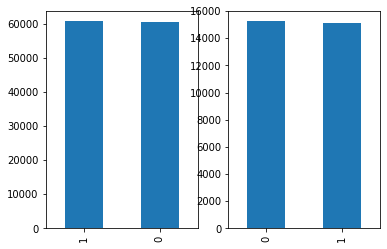

In [ ]:
plt.subplot(1,2,1)
y_train.value_counts().plot(kind='bar')

plt.subplot(1,2,2)
y_test.value_counts().plot(kind='bar')

In [ ]:
rfc = RandomForestClassifier() 
from scipy.stats import randint as sp_randint

param_grid = { 
    'n_estimators': [100,200, 500]
   }
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=samples) #default cv = 3
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
randomCV.fit(x_train, np.ravel(y_train))
print(randomCV.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 7, 'min_samples_split': 8}


In [ ]:
result=pd.DataFrame()

In [ ]:
rfc=RandomForestClassifier( bootstrap=False  ,criterion = 'entropy',max_features=7 ,min_samples_split=8,class_weight='balanced',  max_depth = None, min_samples_leaf=7)
rfc.fit(x_train, np.ravel(y_train))

rfc_y_pred = rfc.predict(x_test)
#best_preds=np.asarray([np.argmax(line) for line in rfc_y_pred])
print('precision ={}'.format(precision_score(y_test,rfc_y_pred)))#best_preds,average='macro')))
print('accuracy ={}'.format(accuracy_score(y_test,rfc_y_pred)))#best_preds)))
print('recall ={}'.format(recall_score(y_test,rfc_y_pred)))#best_preds,average='macro')))
print('F1 Score ={}'.format(f1_score(y_test, rfc_y_pred)))
print('ROC AUC Score={}'.format(roc_auc_score(y_test, rfc_y_pred)))
print(classification_report(y_test, rfc_y_pred))
res= pd.DataFrame({'Method':['RandomForestClassifier'],'Test_accuracy': round(accuracy_score(y_test,rfc_y_pred),2),'precision':round(precision_score(y_test,rfc_y_pred),2),'recall':round(recall_score(y_test,rfc_y_pred),2),'f1 score':round(f1_score(y_test, rfc_y_pred),2),'Auc-Roc':round(roc_auc_score(y_test, rfc_y_pred),2),'f1':round(f1_score(y_test, rfc_y_pred),2)})



precision =0.9858938360743414
accuracy =0.9808952864060081
recall =0.9755887801005557
F1 Score =0.9807142382124094
ROC AUC Score=0.9808731803146616
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     15243
           1       0.99      0.98      0.98     15116

    accuracy                           0.98     30359
   macro avg       0.98      0.98      0.98     30359
weighted avg       0.98      0.98      0.98     30359



In [ ]:
result.append(res)    
cm = confusion_matrix(y_test, rfc_y_pred)
print('Confusion matrix')
print(cm)

Confusion matrix
[[15032   211]
 [  369 14747]]


In [ ]:
dt = DecisionTreeClassifier(random_state=1)

dt.fit(x_train, y_train)

score_dt = dt.score(x_test, y_test)

dt_y_pred = dt.predict(x_test)
#best_preds=np.asarray([np.argmax(line) for line in rfc_y_pred])
print('precision ={}'.format(precision_score(y_test,dt_y_pred)))#best_preds,average='macro')))
print('accuracy ={}'.format(accuracy_score(y_test,dt_y_pred)))#best_preds)))
print('recall ={}'.format(recall_score(y_test,dt_y_pred)))#best_preds,average='macro')))
print('F1 Score ={}'.format(f1_score(y_test, dt_y_pred)))
print('ROC AUC Score={}'.format(roc_auc_score(y_test, dt_y_pred)))
print(classification_report(y_test, dt_y_pred))
res= pd.DataFrame({'Method':['Decisiontree'],'Test_accuracy': round(accuracy_score(y_test,dt_y_pred),2),'precision':round(precision_score(y_test,dt_y_pred),2),'recall':round(recall_score(y_test,dt_y_pred),2),'f1 score':round(f1_score(y_test, dt_y_pred),2),'Auc-Roc':round(roc_auc_score(y_test, dt_y_pred),2)})
result.append(res)    


#svm = SVC(random_state=1, gamma = 'auto')

#svm.fit(pc_train, y_train)

#score5 = svm.score(pc_test, y_test)



precision =0.9920697858842189
accuracy =0.9926216278533548
recall =0.9931198729822704
F1 Score =0.9925945517058978
ROC AUC Score=0.9926237034661402
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15243
           1       0.99      0.99      0.99     15116

    accuracy                           0.99     30359
   macro avg       0.99      0.99      0.99     30359
weighted avg       0.99      0.99      0.99     30359



,Method,Test_accuracy,precision,recall,f1 score,Auc-Roc
0,Decisiontree,0.99,0.99,0.99,0.99,0.99


In [ ]:
cm = confusion_matrix(y_test, dt_y_pred)
print('Confusion matrix')
print(cm)

Confusion matrix
[[15123   120]
 [  104 15012]]


In [ ]:
logreg=LogisticRegression()
parameters = [ 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, np.ravel(y_train))   


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 10, 100, 1000]}])

In [ ]:
grid_search.best_params_

{'C': 1000}

In [ ]:
lr = LogisticRegression(C=1000)#random_state=1, multi_class = 'auto', solver = 'lbfgs', n_jobs=-1, max_iter = 10000 )

lr.fit(x_train, y_train)

score_lr= lr.score(x_test, y_test)
lr_y_pred = lr.predict(x_test)
#best_preds=np.asarray([np.argmax(line) for line in rfc_y_pred])
print('precision ={}'.format(precision_score(y_test,lr_y_pred)))#best_preds,average='macro')))
print('accuracy ={}'.format(accuracy_score(y_test,lr_y_pred)))#best_preds)))
print('recall ={}'.format(recall_score(y_test,lr_y_pred)))#best_preds,average='macro')))
print('F1 Score ={}'.format(f1_score(y_test, lr_y_pred)))
print('ROC AUC Score={}'.format(roc_auc_score(y_test, lr_y_pred)))
print(classification_report(y_test, lr_y_pred))
res= pd.DataFrame({'Method':['LogisticRegression'],'Test_accuracy': round(accuracy_score(y_test,lr_y_pred),2),'precision':round(precision_score(y_test,lr_y_pred),2),'recall':round(recall_score(y_test,lr_y_pred),2),'f1 score':round(f1_score(y_test, lr_y_pred),2),'Auc-Roc':round(roc_auc_score(y_test, lr_y_pred),2),'f1':round(f1_score(y_test, lr_y_pred),2)})
result.append(res)    


score_lr

precision =0.9711157385638477
accuracy =0.9641292532692117
recall =0.9564038105318867
F1 Score =0.9637036296370364
ROC AUC Score=0.9640970702597109
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     15243
           1       0.97      0.96      0.96     15116

    accuracy                           0.96     30359
   macro avg       0.96      0.96      0.96     30359
weighted avg       0.96      0.96      0.96     30359



0.9641292532692117

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic")#,max_depth=12,n_estimators =300, random_state=42, eval_metric="auc")
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.4),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }
xgb_grd_param={'learning_rate': [0.4,0.5],
        'max_depth': [6,7]
    }
#clf = RandomizedSearchCV(xgb_model, param_distributions = param_dist, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)
numFolds = 5
kfold_5 = KFold(shuffle = True, n_splits = numFolds)
clf = GridSearchCV(estimator=xgb_model,param_grid= xgb_grd_param, cv= 5)
clf.fit(x_train, np.ravel(y_train))
print(clf.best_params_)

{'learning_rate': 0.4, 'max_depth': 6}


In [26]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic")#,max_depth=12,n_estimators =300, random_state=42, eval_metric="auc")
param_dist = {'n_estimators': stats.randint(150, 300),
              'learning_rate': stats.uniform(0.01, 0.4),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5 ],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }
xgb_grd_param={'learning_rate': [0.4,0.5],
        'max_depth': [6,7]
    }
clf = RandomizedSearchCV(xgb_model, param_distributions = param_dist)#, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)
#numFolds = 5
#kfold_5 = KFold(shuffle = True, n_splits = numFolds)
#clf = GridSearchCV(estimator=xgb_model,param_grid= xgb_grd_param, cv= 5)
clf.fit(x_train, np.ravel(y_train))
print(clf.best_params_)

{'colsample_bytree': 0.8112432389327484, 'learning_rate': 0.20269716251974193, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 276, 'subsample': 0.8161549511555444}


In [ ]:
xgb_model =xgb.XGBClassifier(learning_rate=0.4, max_depth= 6)
 #xgb.XGBClassifier(colsample_bytree= 0.9032147310861266,
 #learning_rate= 0.32733210006359886,
 #max_depth= 8,
 #min_child_weight= 2,
 #n_estimators= 945,
 #subsample= 0.6369022953371541)#,max_depth=12,n_estimators =300, random_state=42, eval_metric="auc")

xgb_model.fit(x_train, np.ravel(y_train))#, early_stopping_rounds=20, eval_set=[(x_train, y_train),(x_test, y_test)], verbose=False)

xgb_y_pred = xgb_model.predict(x_test)
best_preds=np.asarray([np.argmax(line) for line in xgb_y_pred])
print('precision ={}'.format(precision_score(y_test,xgb_y_pred)))#best_preds,average='macro')))
print('accuracy ={}'.format(accuracy_score(y_test,xgb_y_pred)))#best_preds)))
print('recall ={}'.format(recall_score(y_test,xgb_y_pred)))#best_preds,average='macro')))
print('F1 Score ={}'.format(f1_score(y_test, xgb_y_pred)))
print('ROC AUC Score={}'.format(roc_auc_score(y_test, xgb_y_pred)))
print(classification_report(y_test, xgb_y_pred))
res= pd.DataFrame({'Method':['XGBClassifier'],'Test_accuracy': round(accuracy_score(y_test,xgb_y_pred),2),'precision':round(precision_score(y_test,xgb_y_pred),2),'recall':round(recall_score(y_test,xgb_y_pred),2),'f1 score':round(f1_score(y_test, xgb_y_pred),2),'Auc-Roc':round(roc_auc_score(y_test, xgb_y_pred),2)})
result.append(res)    

cm = confusion_matrix(y_test, xgb_y_pred)
print('Confusion matrix')
print(cm)

precision =0.9932156501119747
accuracy =0.9953885174083468
recall =0.9975522625033078
F1 Score =0.9953792329526701
ROC AUC Score=0.995397531238533
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15243
           1       0.99      1.00      1.00     15116

    accuracy                           1.00     30359
   macro avg       1.00      1.00      1.00     30359
weighted avg       1.00      1.00      1.00     30359

Confusion matrix
[[15140   103]
 [   37 15079]]


XGBClassifier is giving best result, we will try to fine tune it

In [21]:
#xgb_model =xgb.XGBClassifier(learning_rate=0.01, max_depth= 5)
#xgb_model =xgb.XGBClassifier(learning_rate=0.01, max_depth= 5)
#xgb_model =xgb.XGBClassifier(learning_rate=0.02, max_depth= 5)

#xgb_model=xgb.XGBClassifier(colsample_bytree= 0.8112432389327484, learning_rate= 0.20269716251974193, max_depth= 3, min_child_weight= 3, n_estimators= 276, subsample= 0.8161549511555444)
xgb_model=xgb.XGBClassifier(objective="binary:logistic",colsample_bytree= 0.8112432389327484, learning_rate= 0.20269716251974193, max_depth= 3, min_child_weight= 3, n_estimators= 276, subsample= 0.8161549511555444)

#xgb_model=xgb.XGBClassifier(colsample_bytree= 0.8112432389327484, learning_rate= 0.02, max_depth= 5, min_child_weight= 3, n_estimators= 276, subsample= 0.8161549511555444)
#xgb_model=xgb.XGBClassifier(colsample_bytree= 0.8112432389327484, learning_rate= 0.02, max_depth= 5, min_child_weight= 5, n_estimators= 276, subsample= 0.8161549511555444)
#xgb_model=xgb.XGBClassifier(colsample_bytree= 0.8112432389327484, learning_rate= 0.04, max_depth= 5, min_child_weight= 5, n_estimators= 276, subsample= 0.8161549511555444)
#xgb_model=xgb.XGBClassifier(colsample_bytree= 0.8112432389327484, learning_rate= 0.001, max_depth= 5, min_child_weight= 5, n_estimators= 276, subsample= 0.8161549511555444)

 #xgb.XGBClassifier(colsample_bytree= 0.9032147310861266,
 #learning_rate= 0.32733210006359886,
 #max_depth= 8,
 #min_child_weight= 2,
 #n_estimators= 945,
 #subsample= 0.6369022953371541)#,max_depth=12,n_estimators =300, random_state=42, eval_metric="auc")

xgb_model.fit(x_train, np.ravel(y_train))#, early_stopping_rounds=20, eval_set=[(x_train, y_train),(x_test, y_test)], verbose=False)

xgb_y_pred = xgb_model.predict(x_test)
best_preds=np.asarray([np.argmax(line) for line in xgb_y_pred])
print('precision ={}'.format(precision_score(y_test,xgb_y_pred)))#best_preds,average='macro')))
print('accuracy ={}'.format(accuracy_score(y_test,xgb_y_pred)))#best_preds)))
print('recall ={}'.format(recall_score(y_test,xgb_y_pred)))#best_preds,average='macro')))
print('F1 Score ={}'.format(f1_score(y_test, xgb_y_pred)))
print('ROC AUC Score={}'.format(roc_auc_score(y_test, xgb_y_pred)))
print(classification_report(y_test, xgb_y_pred))
res= pd.DataFrame({'Method':['XGBClassifier'],'Test_accuracy': round(accuracy_score(y_test,xgb_y_pred),2),'precision':round(precision_score(y_test,xgb_y_pred),2),'recall':round(recall_score(y_test,xgb_y_pred),2),'f1 score':round(f1_score(y_test, xgb_y_pred),2),'Auc-Roc':round(roc_auc_score(y_test, xgb_y_pred),2)})

cm = confusion_matrix(y_test, xgb_y_pred)
print('Confusion matrix')
print(cm)

precision =0.9935424354243543
accuracy =0.9955202740538226
recall =0.9974861074358295
F1 Score =0.9955103657731414
ROC AUC Score=0.9955284634141687
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15243
           1       0.99      1.00      1.00     15116

    accuracy                           1.00     30359
   macro avg       1.00      1.00      1.00     30359
weighted avg       1.00      1.00      1.00     30359

Confusion matrix
[[15145    98]
 [   38 15078]]


In [30]:
xgb_model=xgb.XGBClassifier(learning_rate= 0.01, max_depth= 5)


xgb_model.fit(x_train, np.ravel(y_train))#, early_stopping_rounds=20, eval_set=[(x_train, y_train),(x_test, y_test)], verbose=False)

xgb_y_pred = xgb_model.predict(x_test)
best_preds=np.asarray([np.argmax(line) for line in xgb_y_pred])
print('precision ={}'.format(precision_score(y_test,xgb_y_pred)))#best_preds,average='macro')))
print('accuracy ={}'.format(accuracy_score(y_test,xgb_y_pred)))#best_preds)))
print('recall ={}'.format(recall_score(y_test,xgb_y_pred)))#best_preds,average='macro')))
print('F1 Score ={}'.format(f1_score(y_test, xgb_y_pred)))
print('ROC AUC Score={}'.format(roc_auc_score(y_test, xgb_y_pred)))
print(classification_report(y_test, xgb_y_pred))
res= pd.DataFrame({'Method':['XGBClassifier'],'Test_accuracy': round(accuracy_score(y_test,xgb_y_pred),2),'precision':round(precision_score(y_test,xgb_y_pred),2),'recall':round(recall_score(y_test,xgb_y_pred),2),'f1 score':round(f1_score(y_test, xgb_y_pred),2),'Auc-Roc':round(roc_auc_score(y_test, xgb_y_pred),2)})

cm = confusion_matrix(y_test, xgb_y_pred)
print('Confusion matrix')
print(cm)

precision =0.9936070651815725
accuracy =0.9954873348924537
recall =0.9973537973008733
F1 Score =0.9954769058073888
ROC AUC Score=0.9954951102885656
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15243
           1       0.99      1.00      1.00     15116

    accuracy                           1.00     30359
   macro avg       1.00      1.00      1.00     30359
weighted avg       1.00      1.00      1.00     30359

Confusion matrix
[[15146    97]
 [   40 15076]]


In [21]:
xgb_model1=xgb.XGBClassifier(learning_rate= 0.01, max_depth= 6)


xgb_model1.fit(x_train, np.ravel(y_train))#, early_stopping_rounds=20, eval_set=[(x_train, y_train),(x_test, y_test)], verbose=False)

xgb_y_pred = xgb_model1.predict(x_test)
best_preds=np.asarray([np.argmax(line) for line in xgb_y_pred])
print('precision ={}'.format(precision_score(y_test,xgb_y_pred)))#best_preds,average='macro')))
print('accuracy ={}'.format(accuracy_score(y_test,xgb_y_pred)))#best_preds)))
print('recall ={}'.format(recall_score(y_test,xgb_y_pred)))#best_preds,average='macro')))
print('F1 Score ={}'.format(f1_score(y_test, xgb_y_pred)))
print('ROC AUC Score={}'.format(roc_auc_score(y_test, xgb_y_pred)))
print(classification_report(y_test, xgb_y_pred))

cm = confusion_matrix(y_test, xgb_y_pred)
print('Confusion matrix')
print(cm)

precision =0.9936087500823615
accuracy =0.9956190915379295
recall =0.997618417570786
F1 Score =0.9956095467599776
ROC AUC Score=0.9956274204235221
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15243
           1       0.99      1.00      1.00     15116

    accuracy                           1.00     30359
   macro avg       1.00      1.00      1.00     30359
weighted avg       1.00      1.00      1.00     30359

Confusion matrix
[[15146    97]
 [   36 15080]]


In [28]:
xgb_model2=xgb.XGBClassifier(learning_rate= 0.4, max_depth= 6)


xgb_model2.fit(x_train, np.ravel(y_train))#, early_stopping_rounds=20, eval_set=[(x_train, y_train),(x_test, y_test)], verbose=False)

xgb_y_pred = xgb_model2.predict(x_test)
best_preds=np.asarray([np.argmax(line) for line in xgb_y_pred])
print('precision ={}'.format(precision_score(y_test,xgb_y_pred)))#best_preds,average='macro')))
print('accuracy ={}'.format(accuracy_score(y_test,xgb_y_pred)))#best_preds)))
print('recall ={}'.format(recall_score(y_test,xgb_y_pred)))#best_preds,average='macro')))
print('F1 Score ={}'.format(f1_score(y_test, xgb_y_pred)))
print('ROC AUC Score={}'.format(roc_auc_score(y_test, xgb_y_pred)))
print(classification_report(y_test, xgb_y_pred))

cm = confusion_matrix(y_test, xgb_y_pred)
print('Confusion matrix')
print(cm)

precision =0.9933469468414465
accuracy =0.9954873348924537
recall =0.997618417570786
F1 Score =0.9954781001419282
ROC AUC Score=0.9954962126560222
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15243
           1       0.99      1.00      1.00     15116

    accuracy                           1.00     30359
   macro avg       1.00      1.00      1.00     30359
weighted avg       1.00      1.00      1.00     30359

Confusion matrix
[[15142   101]
 [   36 15080]]


In [29]:
import pickle
filename = '/content/MyDrive/MyDrive/AI/xgb_model2.sav'
pickle.dump(xgb_model2, open(filename, 'wb'))

In [22]:
import pickle
filename = '/content/MyDrive/MyDrive/AI/xgb_model1.sav'
pickle.dump(xgb_model1, open(filename, 'wb'))

In [32]:
import pickle
filename = '/content/MyDrive/MyDrive/AI/xgb_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))


In [30]:
y_pred_submission = xgb_model2.predict(df_test_encoded)
#best_preds=np.asarray([np.argmax(line) for line in y_pred_submission])

In [31]:
res = pd.DataFrame(y_pred_submission)
res.index = data_test['ID'] 
res.columns = ["Default"]
res.to_csv("/content/MyDrive/MyDrive/AI/prediction_results.csv")


In [32]:
xgb_model1.get_params

<bound method XGBModel.get_params of XGBClassifier(learning_rate=0.01, max_depth=6)>

Model xgb_model1 with parameter learning_rate=0.01, max_depth=6 gives best accuracy